# Introduction

### New York City is a large city where crime is a part of daily life. This project will analyze NYPD complaint data which includes felonies, misdemeanors, and violation crimes to provide insights into the patterns and trends of crime across the city. This anaylsis will show: 

- ### Peak crime times
- ### Where higher crime rates occur
- ### The type of crimes that are most common, violent, property, etc
- ### The demographic groups that experience the most crime

### We will need to import the data as a csv, preprocess and normalize the data, use multiple statistical techniques and visualizations to show trends. The results, the meaning of the trends, and potentially what can be done about crime in New York City will be discussed in the conclusion.

## Import Libraries That Will Be Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

## Read CSV Data Into Dataframe And Display Rows

In [2]:
# read the csv using pd csv indicating the delimiter is ',' and show sample of rows
df = pd.read_csv("NYPD_Complaint_Data.csv", delimiter=",", low_memory=False)
df.head(5)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,282536052,79,BROOKLYN,02/15/2024,07:20:00,NaN,(null),COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,104,FELONY,INSIDE,RAPE,(null),PATROL BORO BKLYN NORTH,153.0,RAPE 3,RESIDENCE - APT. HOUSE,02/20/2024,(null),<18,UNKNOWN,M,NaN,<18,UNKNOWN,F,999496.0,190300.0,40.689001,-73.945027,"(40.68900139556, -73.9450265328727)",POINT (-73.9450265328727 40.68900139556)
1,282805297,42,BRONX,02/25/2024,12:24:00,NaN,(null),COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,578,VIOLATION,INSIDE,HARRASSMENT 2,(null),PATROL BORO BRONX,638.0,"HARASSMENT,SUBD 3,4,5",(null),02/25/2024,(null),18-24,BLACK,M,NaN,45-64,BLACK,M,1013401.0,241248.0,40.828800,-73.894664,"(40.8288, -73.894664)",POINT (-73.894664 40.8288)
2,280611665,105,QUEENS,01/16/2024,08:00:00,01/16/2024,08:10:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,578,VIOLATION,FRONT OF,HARRASSMENT 2,(null),PATROL BORO QUEENS SOUTH,638.0,"HARASSMENT,SUBD 3,4,5",(null),01/16/2024,(null),65+,WHITE,F,NaN,65+,WHITE,M,1062950.0,205790.0,40.731173,-73.716036,"(40.731173, -73.716036)",POINT (-73.716036 40.731173)
3,284354345,68,BROOKLYN,03/25/2024,11:16:00,03/25/2024,16:00:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,351,MISDEMEANOR,FRONT OF,CRIMINAL MISCHIEF & RELATED OF,(null),PATROL BORO BKLYN SOUTH,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",STREET,03/26/2024,(null),(null),(null),(null),NaN,45-64,ASIAN / PACIFIC ISLANDER,M,980639.0,170223.0,40.633899,-74.013008,"(40.633899, -74.013008)",POINT (-74.013008 40.633899)
4,282082987,17,MANHATTAN,02/12/2024,12:35:00,02/12/2024,12:40:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,(null),PATROL BORO MAN SOUTH,339.0,"LARCENY,PETIT FROM OPEN AREAS,",STREET,02/12/2024,(null),25-44,BLACK,F,NaN,UNKNOWN,UNKNOWN,D,992155.0,213560.0,40.752848,-73.971465,"(40.752848, -73.971465)",POINT (-73.971465 40.752848)


## Update DF By Making Column Names More Descriptive

In [3]:
df.rename(columns={
    "CMPLNT_NUM": "COMPLAINT_ID",
    "ADDR_PCT_CD": "PRECINCT_NUM",
    "BORO_NM": "BOROUGH",
    "CMPLNT_FR_DT": "COMPLAINT_START_DATE",
    "CMPLNT_FR_TM": "COMPLAINT_START_TIME",
    "CMPLNT_TO_DT": "COMPLAINT_END_DATE",
    "CMPLNT_TO_TM": "COMPLAINT_END_TIME",
    "CRM_ATPT_CPTD_CD": "CRIME_STATUS",
    "HADEVELOPT": "HOUSING_DEV_NAME",
    "KY_CD": "OFFENSE_CODE",
    "LAW_CAT_CD": "OFFENSE_LEVEL",
    "LOC_OF_OCCUR_DESC": "LOCATION_TYPE",
    "PD_CD": "PD_CODE",
    "RPT_DT": "REPORT_DATE"
}, inplace=True)
df.head(5)

,COMPLAINT_ID,PRECINCT_NUM,BOROUGH,COMPLAINT_START_DATE,COMPLAINT_START_TIME,COMPLAINT_END_DATE,COMPLAINT_END_TIME,CRIME_STATUS,HOUSING_DEV_NAME,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,OFFENSE_CODE,OFFENSE_LEVEL,LOCATION_TYPE,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CODE,PD_DESC,PREM_TYP_DESC,REPORT_DATE,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,282536052,79,BROOKLYN,02/15/2024,07:20:00,NaN,(null),COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,104,FELONY,INSIDE,RAPE,(null),PATROL BORO BKLYN NORTH,153.0,RAPE 3,RESIDENCE - APT. HOUSE,02/20/2024,(null),<18,UNKNOWN,M,NaN,<18,UNKNOWN,F,999496.0,190300.0,40.689001,-73.945027,"(40.68900139556, -73.9450265328727)",POINT (-73.9450265328727 40.68900139556)
1,282805297,42,BRONX,02/25/2024,12:24:00,NaN,(null),COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,578,VIOLATION,INSIDE,HARRASSMENT 2,(null),PATROL BORO BRONX,638.0,"HARASSMENT,SUBD 3,4,5",(null),02/25/2024,(null),18-24,BLACK,M,NaN,45-64,BLACK,M,1013401.0,241248.0,40.828800,-73.894664,"(40.8288, -73.894664)",POINT (-73.894664 40.8288)
2,280611665,105,QUEENS,01/16/2024,08:00:00,01/16/2024,08:10:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,578,VIOLATION,FRONT OF,HARRASSMENT 2,(null),PATROL BORO QUEENS SOUTH,638.0,"HARASSMENT,SUBD 3,4,5",(null),01/16/2024,(null),65+,WHITE,F,NaN,65+,WHITE,M,1062950.0,205790.0,40.731173,-73.716036,"(40.731173, -73.716036)",POINT (-73.716036 40.731173)
3,284354345,68,BROOKLYN,03/25/2024,11:16:00,03/25/2024,16:00:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,351,MISDEMEANOR,FRONT OF,CRIMINAL MISCHIEF & RELATED OF,(null),PATROL BORO BKLYN SOUTH,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",STREET,03/26/2024,(null),(null),(null),(null),NaN,45-64,ASIAN / PACIFIC ISLANDER,M,980639.0,170223.0,40.633899,-74.013008,"(40.633899, -74.013008)",POINT (-74.013008 40.633899)
4,282082987,17,MANHATTAN,02/12/2024,12:35:00,02/12/2024,12:40:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,(null),PATROL BORO MAN SOUTH,339.0,"LARCENY,PETIT FROM OPEN AREAS,",STREET,02/12/2024,(null),25-44,BLACK,F,NaN,UNKNOWN,UNKNOWN,D,992155.0,213560.0,40.752848,-73.971465,"(40.752848, -73.971465)",POINT (-73.971465 40.752848)


## Pre-processing Of Data

#### check unique values in "PRECINCT_NUM", replace if there are nulls


In [4]:
print("Before replace:", df["PRECINCT_NUM"].unique())

Before replace: [ 79  42 105  68  17 120  43  70  62  25  14   9 121   1  78  20  84 122
   5  13  61 123  72  19  18  71  10  76  66   7  60  77  24 108  88  67
  90  94   6  30  26  22  28  46  23  44  32  40  73 114 103 104 109  75
  52 107  47  48  49  50 101 106  69 113 110  81  45  41  33  83  34  63
 100 115 102 112 111]


#### check unique values in "BOROUGHS", replace if there are nulls

In [5]:
print("Before replace:", df["BOROUGH"].unique())

df['BOROUGH'].replace('(null)', 'No Info', inplace=True)

print("\nAfter replace:", df["BOROUGH"].unique())

Before replace: ['BROOKLYN' 'BRONX' 'QUEENS' 'MANHATTAN' 'STATEN ISLAND' '(null)']

After replace: ['BROOKLYN' 'BRONX' 'QUEENS' 'MANHATTAN' 'STATEN ISLAND' 'No Info']


#### check unique values in "OFFENSE_LEVEL", replace if there are nulls

In [6]:
print("Before replace:", df["OFFENSE_LEVEL"].unique())

Before replace: ['FELONY' 'VIOLATION' 'MISDEMEANOR']


#### check unique values in "VIC_AGE_GROUP", replace invalid data

In [7]:
print("Before replace:", df["VIC_AGE_GROUP"].unique())

invalid_ages = ["-28", "-958", "966", "-951", "928", "953", "-1", "1023", "934", "-924", "963"]
df['VIC_AGE_GROUP'].replace(invalid_ages, "UNKNOWN", inplace=True)

print("\nAfter replace:", df["VIC_AGE_GROUP"].unique())

Before replace: ['<18' '45-64' '65+' 'UNKNOWN' '25-44' '18-24' '-28' '-958' '966' '-951'
 '928' '953' '-1' '1023' '934' '-924' '963']

After replace: ['<18' '45-64' '65+' 'UNKNOWN' '25-44' '18-24']


#### check unique values in "VIC_RACE", replace invalid data

In [8]:
print("Before replace:", df["VIC_RACE"].unique())

Before replace: ['UNKNOWN' 'BLACK' 'WHITE' 'ASIAN / PACIFIC ISLANDER' 'WHITE HISPANIC'
 'BLACK HISPANIC' 'AMERICAN INDIAN/ALASKAN NATIVE']


#### check unique values in "VIC_SEX", replace invalid data

In [9]:
print("Before replace:", df["VIC_SEX"].unique())
print("\nBased on dataset notes, 'F' is Female, 'M' is Male, 'D' is Buisness/Organization, 'E' is the People of the State of New York and 'L' is Unspecified\n")

df["VIC_SEX"].replace("L", "NA", inplace=True)

print("After replace:", df["VIC_SEX"].unique())

Before replace: ['F' 'M' 'D' 'L' 'E']

Based on dataset notes, 'F' is Female, 'M' is Male, 'D' is Buisness/Organization, 'E' is the People of the State of New York and 'L' is Unspecified

After replace: ['F' 'M' 'D' 'NA' 'E']


#### replace nan values in longitude and latitude

In [11]:
df["Latitude"] = df["Latitude"].fillna("NA")
df["Longitude"] = df["Longitude"].fillna("NA")

## Create Dataframes To Address The Objectives Stated In Proposal

#### Dataframe To Analyze When Crimes In NYC Take Place

In [12]:
Location_Time_DF = df[["COMPLAINT_START_DATE", "COMPLAINT_START_TIME", "OFFENSE_LEVEL"]].copy()
Location_Time_DF.head()

,COMPLAINT_START_DATE,COMPLAINT_START_TIME,OFFENSE_LEVEL
0,02/15/2024,07:20:00,FELONY
1,02/25/2024,12:24:00,VIOLATION
2,01/16/2024,08:00:00,VIOLATION
3,03/25/2024,11:16:00,MISDEMEANOR
4,02/12/2024,12:35:00,MISDEMEANOR


#### Dataframe To Examine Which Neighborhoods/Boroughs Experience A Higher Crime Rate

In [13]:
Neighborhood_DF = df[["BOROUGH", "PRECINCT_NUM", "OFFENSE_LEVEL", "Latitude", "Longitude"]].copy()
Neighborhood_DF.head()

,BOROUGH,PRECINCT_NUM,OFFENSE_LEVEL,Latitude,Longitude
0,BROOKLYN,79,FELONY,40.689001,-73.945027
1,BRONX,42,VIOLATION,40.8288,-73.894664
2,QUEENS,105,VIOLATION,40.731173,-73.716036
3,BROOKLYN,68,MISDEMEANOR,40.633899,-74.013008
4,MANHATTAN,17,MISDEMEANOR,40.752848,-73.971465


#### Dataframe To Analyze The Distribution Of Specific Crime Categories. Ex: violent vs property

In [14]:
Crime_DF = df[["OFFENSE_LEVEL", "OFNS_DESC"]].copy()
Crime_DF.head()

,OFFENSE_LEVEL,OFNS_DESC
0,FELONY,RAPE
1,VIOLATION,HARRASSMENT 2
2,VIOLATION,HARRASSMENT 2
3,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF
4,MISDEMEANOR,PETIT LARCENY


#### Dataframe To Analyze The Groups That Experience The Most Crime. Ex: age, race, etc

In [15]:
Victim_DF = df[["VIC_AGE_GROUP", "VIC_RACE", "VIC_SEX"]].copy()
Victim_DF.head()

,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,<18,UNKNOWN,F
1,45-64,BLACK,M
2,65+,WHITE,M
3,45-64,ASIAN / PACIFIC ISLANDER,M
4,UNKNOWN,UNKNOWN,D


### Create New Columns To Aid With Our Objectives

#### Create Two New Columns For Month And Hour Of Incident. And Check For Null Values

In [16]:
# Split Complaint_Start_Date and Complaint_Start_Time and return the first field to get Month and Hour
Location_Time_DF["INCIDENT_MONTH"] = Location_Time_DF["COMPLAINT_START_DATE"].apply(lambda x: x.split("/")[0])
Location_Time_DF["INCIDENT_HOUR"] = Location_Time_DF["COMPLAINT_START_TIME"].apply(lambda x: x.split(":")[0])

print("Unique Months:", Location_Time_DF["INCIDENT_MONTH"].unique())
print("\nUnique Hours:", Location_Time_DF["INCIDENT_HOUR"].unique())

Location_Time_DF.head()

Unique Months: ['02' '01' '03' '12' '10' '07' '06' '11' '09' '04' '08' '05']

Unique Hours: ['07' '12' '08' '11' '21' '14' '04' '15' '23' '02' '13' '09' '17' '01'
 '16' '10' '22' '19' '18' '20' '00' '06' '05' '03']


,COMPLAINT_START_DATE,COMPLAINT_START_TIME,OFFENSE_LEVEL,INCIDENT_MONTH,INCIDENT_HOUR
0,02/15/2024,07:20:00,FELONY,02,07
1,02/25/2024,12:24:00,VIOLATION,02,12
2,01/16/2024,08:00:00,VIOLATION,01,08
3,03/25/2024,11:16:00,MISDEMEANOR,03,11
4,02/12/2024,12:35:00,MISDEMEANOR,02,12


#### List Unique Values of "OFNS_DESC"

In [17]:
print(Crime_DF["OFNS_DESC"].unique())

['RAPE' 'HARRASSMENT 2' 'CRIMINAL MISCHIEF & RELATED OF' 'PETIT LARCENY'
 'FELONY ASSAULT' 'OFFENSES AGAINST PUBLIC ADMINI'
 'MURDER & NON-NEGL. MANSLAUGHTER' 'GRAND LARCENY'
 'ASSAULT 3 & RELATED OFFENSES' 'POSSESSION OF STOLEN PROPERTY'
 'GRAND LARCENY OF MOTOR VEHICLE' 'DANGEROUS WEAPONS' 'CRIMINAL TRESPASS'
 'OFF. AGNST PUB ORD SENSBLTY &' 'NYS LAWS-UNCLASSIFIED FELONY' 'FRAUDS'
 'OFFENSES INVOLVING FRAUD' 'SEX CRIMES' 'OTHER STATE LAWS (NON PENAL LA'
 'FORGERY' 'ROBBERY' 'DANGEROUS DRUGS' 'ARSON' 'MISCELLANEOUS PENAL LAW'
 'VEHICLE AND TRAFFIC LAWS' 'BURGLARY' 'CANNABIS RELATED OFFENSES'
 'ADMINISTRATIVE CODE' 'OFFENSES AGAINST THE PERSON' 'OTHER STATE LAWS'
 'OFFENSES AGAINST PUBLIC SAFETY' 'ESCAPE 3' 'GAMBLING' 'THEFT-FRAUD'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'KIDNAPPING & RELATED OFFENSES'
 'PETIT LARCENY OF MOTOR VEHICLE' 'ENDAN WELFARE INCOMP'
 'FRAUDULENT ACCOSTING' 'PROSTITUTION & RELATED OFFENSES'
 'INTOXICATED & IMPAIRED DRIVING' 'JOSTLING'
 'CHILD ABANDONMENT/NON SU

#### Create New Column That Says Whether A Crime Was Violent Or Not

In [18]:
# if crime in overlap then it will be "NONE, else if in nonviolent it will be "NON-VIOLENT", 
# else it will be "VIOLENT"
nonviolent_crimes = [
    "CRIMINAL MISCHIEF & RELATED OF", "PETIT LARCENY", "OFFENSES AGAINST PUBLIC ADMINI", "GRAND LARCENY",
    "POSSESSION OF STOLEN PROPERTY", "GRAND LARCENY OF MOTOR VEHICLE", "CRIMINAL TRESPASS",
    "OFF. AGNST PUB ORD SENSBLTY &", "FRAUDS", "OFFENSES INVOLVING FRAUD", "FORGERY", "DANGEROUS DRUGS",
    "VEHICLE AND TRAFFIC LAWS", "CANNABIS RELATED OFFENSES", "ADMINISTRATIVE CODE", "ESCAPE 3",
    "GAMBLING", "THEFT-FRAUD", "AGRICULTURE & MRKTS LAW-UNCLASSIFIED", "PETIT LARCENY OF MOTOR VEHICLE",
    "ENDAN WELFARE INCOMP", "FRAUDULENT ACCOSTING", "PROSTITUTION & RELATED OFFENSES",
    "CHILD ABANDONMENT/NON SUPPORT", "BURGLAR'S TOOLS", "UNAUTHORIZED USE OF A VEHICLE",
    "DISRUPTION OF A RELIGIOUS SERV", "THEFT OF SERVICES", "OTHER OFFENSES RELATED TO THEF",
    "ALCOHOLIC BEVERAGE CONTROL LAW", "FORTUNE TELLING", ""
]

overlap_crimes = [
    "NYS LAWS-UNCLASSIFIED FELONY", "OTHER STATE LAWS (NON PENAL LA", "MISCELLANEOUS PENAL LAW",
    "BURGLARY", "OTHER STATE LAWS", "ANTICIPATORY OFFENSES", "DISORDERLY CONDUCT", "NYS LAWS-UNCLASSIFIED VIOLATION",
    "INTOXICATED/IMPAIRED DRIVING", "INTOXICATED & IMPAIRED DRIVING", "(null)"
]

# function to categorize "OFNS_DESC" in a new column
def categorize(offense):
    if offense in nonviolent_crimes:
        return "Non-Violent"
    elif offense in overlap_crimes:
        return "None"
    else:
        return "Violent"

Crime_DF["Crime_Category"] = Crime_DF["OFNS_DESC"].apply(categorize)
Crime_DF.head()

,OFFENSE_LEVEL,OFNS_DESC,Crime_Category
0,FELONY,RAPE,Violent
1,VIOLATION,HARRASSMENT 2,Violent
2,VIOLATION,HARRASSMENT 2,Violent
3,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,Non-Violent
4,MISDEMEANOR,PETIT LARCENY,Non-Violent


# Visualizations

## Analyze when crimes in NYC take place

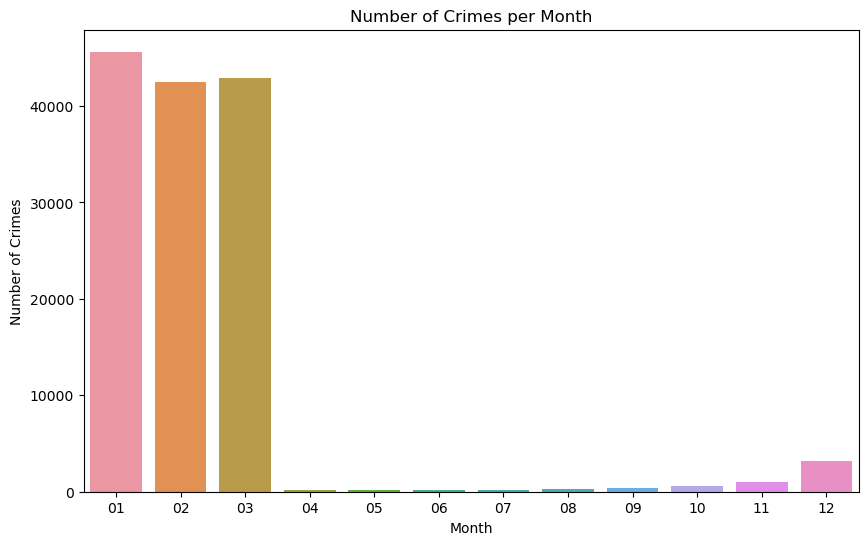

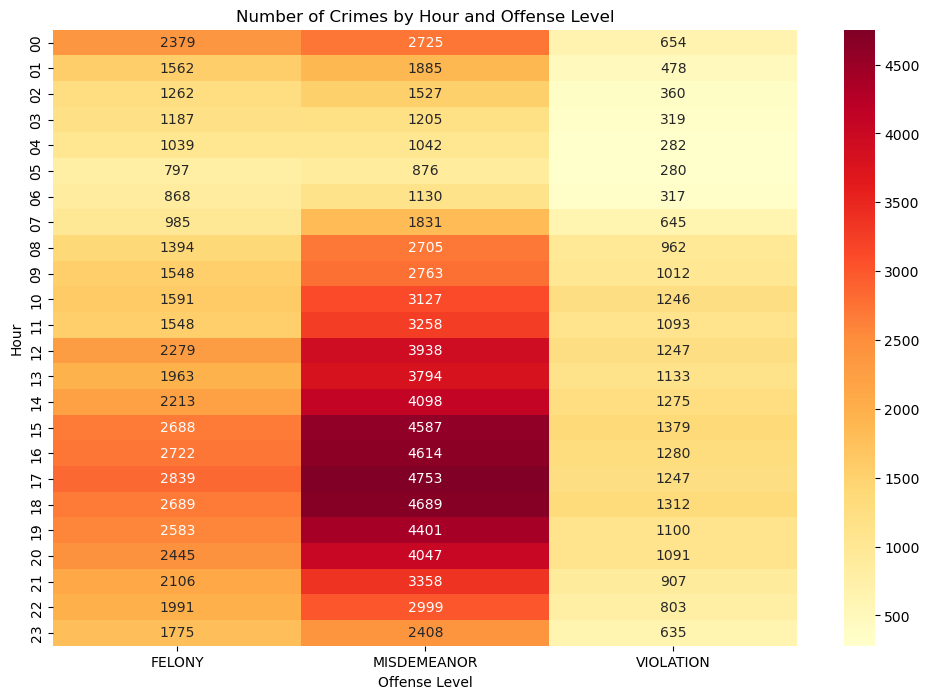

In [19]:
# Create a bar chart to visualize the number of crimes per month
plt.figure(figsize=(10, 6))
sns.countplot(data=Location_Time_DF, x='INCIDENT_MONTH', order=sorted(Location_Time_DF['INCIDENT_MONTH'].unique()))
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Month')
plt.show()

# Create a heatmap to visualize the number of crimes by hour and offense level
plt.figure(figsize=(12, 8))
sns.heatmap(Location_Time_DF.pivot_table(index='INCIDENT_HOUR', columns='OFFENSE_LEVEL', values='COMPLAINT_START_TIME', aggfunc='count'), cmap='YlOrRd', annot=True, fmt='d')
plt.xlabel('Offense Level')
plt.ylabel('Hour')
plt.title('Number of Crimes by Hour and Offense Level')
plt.show()

## Examine which boroughs experience a higher crime rate


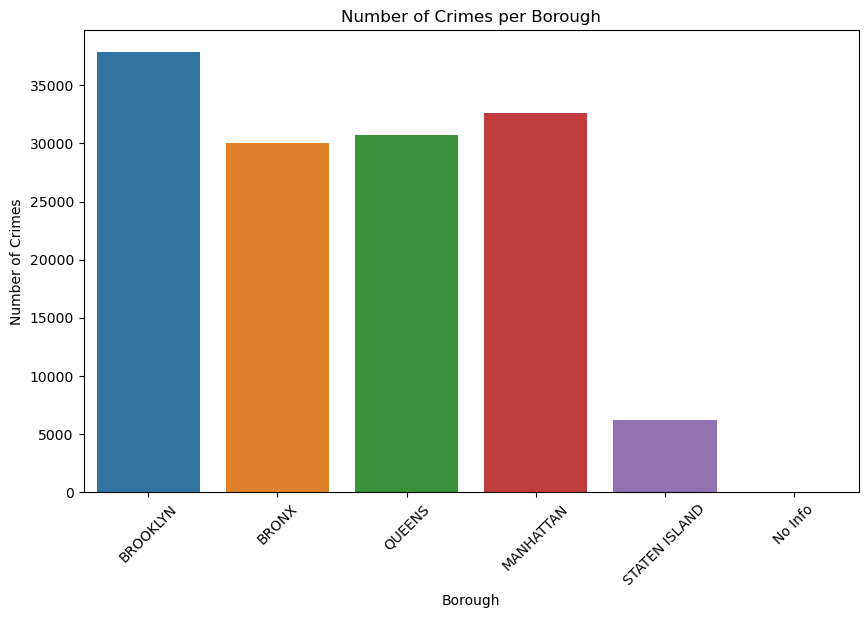

In [20]:
# Create a bar chart to compare the number of crimes per borough
plt.figure(figsize=(10, 6))
sns.countplot(data=Neighborhood_DF, x='BOROUGH')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Borough')
plt.xticks(rotation=45)
plt.show()

## Analyze the distribution of specific crime categories. Ex violent vs property

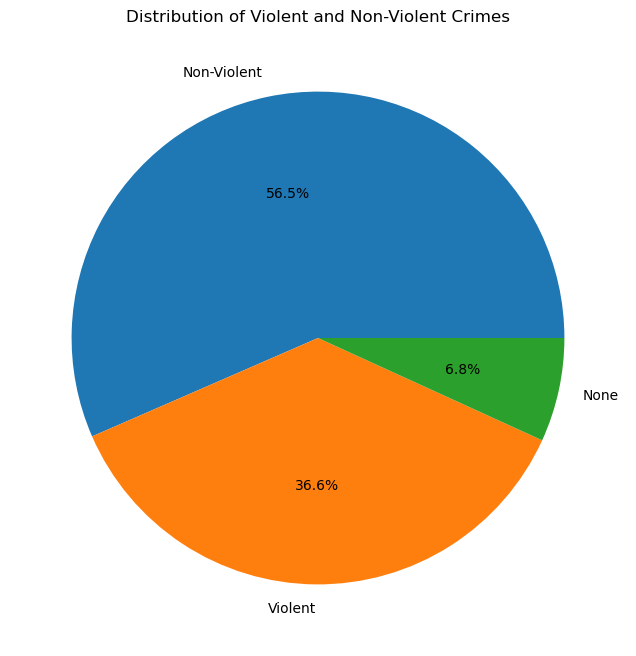

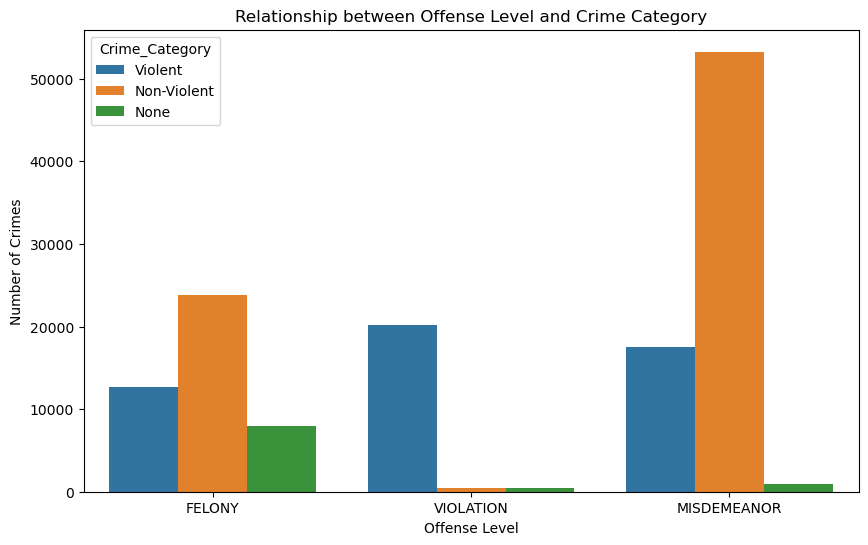

In [21]:
# Create a pie chart to show the proportion of violent and non-violent crimes
plt.figure(figsize=(8, 8))
Crime_DF['Crime_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Violent and Non-Violent Crimes')
plt.ylabel('')
plt.show()

# Analyze the relationship between offense level and crime category using a stacked bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=Crime_DF, x='OFFENSE_LEVEL', hue='Crime_Category')
plt.xlabel('Offense Level')
plt.ylabel('Number of Crimes')
plt.title('Relationship between Offense Level and Crime Category')
plt.show()

## Analyze the groups that experience the most crime. Ex: age and race

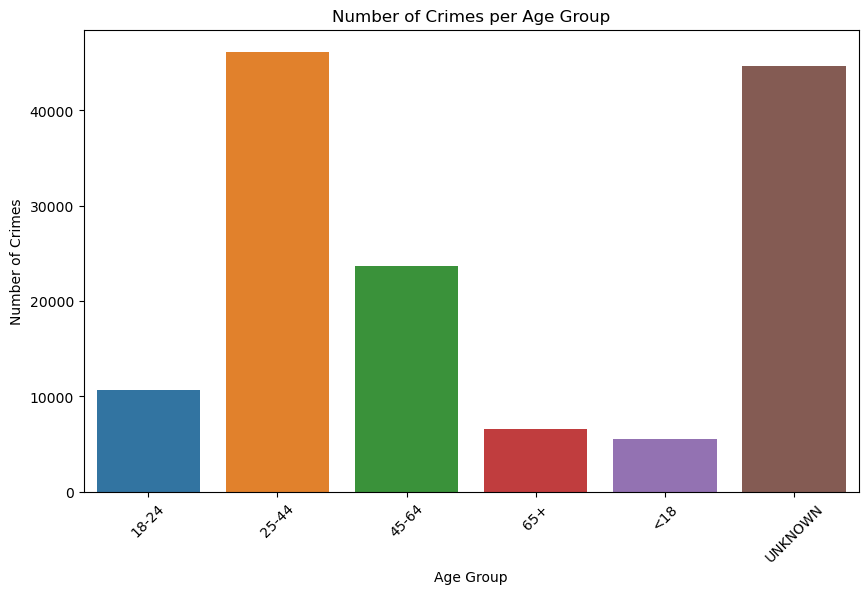

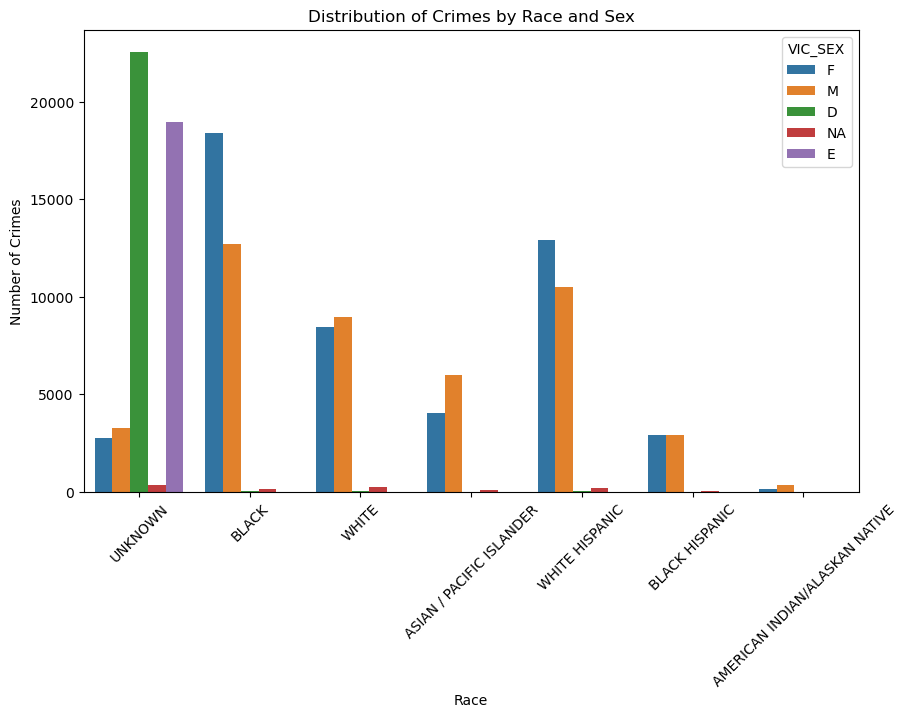

In [22]:
# Create a bar chart to show the number of crimes per age group
plt.figure(figsize=(10, 6))
sns.countplot(data=Victim_DF, x='VIC_AGE_GROUP', order=sorted(Victim_DF['VIC_AGE_GROUP'].unique()))
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Age Group')
plt.xticks(rotation=45)
plt.show()

# Create a stacked bar chart to visualize the distribution of crimes by race and sex
plt.figure(figsize=(10, 6))
sns.countplot(data=Victim_DF, x='VIC_RACE', hue='VIC_SEX')
plt.xlabel('Race')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crimes by Race and Sex')
plt.xticks(rotation=45)
plt.show()

## Information about complaints in New York City

In [23]:
# Create a table to show the top 10 offenses by count
top_offenses = Crime_DF['OFNS_DESC'].value_counts().head(10)
top_offenses_table = pd.DataFrame({'Offense': top_offenses.index, 'Count': top_offenses.values})
print("Top 10 Offenses by Count:")
print(top_offenses_table)

Top 10 Offenses by Count:
                          Offense  Count
0                   PETIT LARCENY  26487
1                   HARRASSMENT 2  20136
2    ASSAULT 3 & RELATED OFFENSES  14247
3                   GRAND LARCENY  11639
4  CRIMINAL MISCHIEF & RELATED OF   9417
5        VEHICLE AND TRAFFIC LAWS   6538
6                  FELONY ASSAULT   6417
7   OFF. AGNST PUB ORD SENSBLTY &   4519
8         MISCELLANEOUS PENAL LAW   4441
9                         ROBBERY   3948


In [24]:
# Create a table to show the crime counts by borough and offense level
borough_offense_level = pd.crosstab(Neighborhood_DF['BOROUGH'], Neighborhood_DF['OFFENSE_LEVEL'])
print("Crime Counts by Borough and Offense Level:")
print(borough_offense_level)

Crime Counts by Borough and Offense Level:
OFFENSE_LEVEL  FELONY  MISDEMEANOR  VIOLATION
BOROUGH                                      
BRONX           10103        15093       4795
BROOKLYN        12321        19300       6209
MANHATTAN       10413        17687       4467
No Info             1            5          1
QUEENS           9981        16252       4444
STATEN ISLAND    1634         3423       1141


In [25]:
# Create a table to show the crime counts by victim age group and sex
age_group_sex = pd.crosstab(Victim_DF['VIC_AGE_GROUP'], Victim_DF['VIC_SEX'])
print("Crime Counts by Victim Age Group and Sex:")
print(age_group_sex)

Crime Counts by Victim Age Group and Sex:
VIC_SEX            D      E      F      M   NA
VIC_AGE_GROUP                                 
18-24              3      0   6061   4439  118
25-44              4      1  24525  20908  730
45-64              2      1  11566  12041   81
65+                1      0   3309   3227    2
<18                0      0   3149   2429    0
UNKNOWN        22659  19006   1102   1717  189


In [26]:
# Create a table to show the crime counts by crime category and offense level
category_offense_level = pd.crosstab(Crime_DF['Crime_Category'], Crime_DF['OFFENSE_LEVEL'])
print("Crime Counts by Crime Category and Offense Level:")
print(category_offense_level)

Crime Counts by Crime Category and Offense Level:
OFFENSE_LEVEL   FELONY  MISDEMEANOR  VIOLATION
Crime_Category                                
Non-Violent      23866        53279        464
None              7919          981        453
Violent          12668        17500      20140


## Machine Learning Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


data = Crime_DF.copy()
data = data.merge(Neighborhood_DF[['BOROUGH', 'PRECINCT_NUM']], left_index=True, right_index=True)

features = ['BOROUGH', 'PRECINCT_NUM']
target = 'Crime_Category'

label_encoder = LabelEncoder()
for feature in features:
    if data[feature].dtype == 'object':
        data[feature] = label_encoder.fit_transform(data[feature])

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
new_data = pd.DataFrame({
    'BOROUGH': ['MANHATTAN', 'BROOKLYN', 'QUEENS'],
    'PRECINCT_NUM': [17, 79, 105]
})
for feature in features:
    if new_data[feature].dtype == 'object':
        new_data[feature] = label_encoder.transform(new_data[feature])
new_predictions = rf_model.predict(new_data)
print("Predictions for New Data:")
print(new_predictions)

Accuracy: 0.5715378451227507
Classification Report:


/Users/angelserrano/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/angelserrano/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Non-Violent       0.58      0.93      0.71     15560
        None       0.00      0.00      0.00      1874
     Violent       0.49      0.12      0.19     10020

    accuracy                           0.57     27454
   macro avg       0.36      0.35      0.30     27454
weighted avg       0.51      0.57      0.47     27454

Predictions for New Data:
['Non-Violent' 'Non-Violent' 'Non-Violent']


/Users/angelserrano/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analysis Process

- ### We first read the csv file of the complaints into a dataframe.
- ### Then, we preprocessed the data by renaming columns to make them more descriptive.
- ### We then identified unique values to replace null/invalid values in the dataframe for the columns we will be working with. 
- ### After replacing invalid values, we created smaller dataframes to address our objectives.
- ### For two of our smaller dataframes, we needed the month, hour, and if the crime was violent or not so we wrote code to extract these values and made new columns with them.
- ### We then created visuals to address our objectives, which will be discussed in more detail in our conclusion.
- ### Lastly, we used statistics to answer some questions about complaints in New York City.

# Conclusion

## Analyze when crimes in NYC take place

### In our first visualization (bar chart), we can see the number of complaints reported in each month.
- The number of complaints is heavily skewed towards the beginning in January, February, and March. 
- This suggests that there may be an issue with how complaint data was recorded resulting in the first 3 months of the year being overrepresented in this dataset. 

***

### In our second visualization (heatmap), we can see the number of complaints reported at each hour of the day seperated by offense level (Felony, Misdemeanor, Violation.
- From this heatmap we see that Complaint reports peak during mid afternoon to early evening hours with the most complaints recorded from 3PM to 7PM for all offense levels.
- Although violations show a more even distribution for all hours, complaints still peak during mid afternoon to early evening hours.
- This distribution across all offense levels can be due to: increased activity in public as people leave school and leave work at this time. This could also be the times where people go out with friends and have other social interactions which may cause an increase in crime complaints.